In [145]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
#parameters
k_features=100
n_users=943
n_movies=1682

iterations=200
beta=1

P_train=np.random.rand(n_users,k_features)
Q_train=np.random.rand(n_movies,k_features)

#load data
def load_data(path):
    R_label = np.zeros((n_users, n_movies))
    f = open(path)
    for line in f.readlines():
        [user,movie,score,_] = line.strip().split("\t")
        R_label[int(user)-1,int(movie)-1]=int(score)
    return R_label

R_train=load_data("./ml-100k/u5.base")
R_validation=load_data("./ml-100k/u5.test")

print(R_train.shape)
print(R_validation.shape)

(943, 1682)
(943, 1682)


In [146]:
#train
train_loss=[]
validation_loss=[]

for iter in range(iterations):
    print("iteration:",iter)     
    I=np.eye(k_features)
    P_train = np.dot(np.dot(inv(np.dot(Q_train.T,Q_train)+beta*I),Q_train.T),R_train.T).T
    Q_train = np.dot(np.dot(inv(np.dot(P_train.T,P_train)+beta*I),P_train.T),R_train).T
    
    #train loss
    L2=0  
    P=np.abs(P_train)
    for i in range(n_users): 
        L2+=np.count_nonzero(P[i])*np.sum(np.multiply(P[i],P[i]))
    
    Q=np.abs(Q_train)
    for j in range(n_movies):
         L2+=np.count_nonzero(Q[j])*np.sum(np.multiply(Q[i],Q[i]))
    
    trainloss=np.sum((R_train-np.dot(P_train,Q_train.T))**2)/np.count_nonzero(R_train)+ beta*L2
    train_loss.append(trainloss)
    
    #validation loss
    validationloss=np.sum((R_validation-np.dot(P_train,Q_train.T))**2)/ np.count_nonzero(R_validation)+ beta*L2
    validation_loss.append(validationloss)
    print("train loss",trainloss,"validation loss",validationloss)

iteration: 0
train loss 3604706.8065 validation loss 3604732.09794
iteration: 1
train loss 2599745.74009 validation loss 2599780.64104
iteration: 2
train loss 2182530.9371 validation loss 2182568.31574
iteration: 3
train loss 1929327.50343 validation loss 1929366.04487
iteration: 4
train loss 1742238.498 validation loss 1742277.72445
iteration: 5
train loss 1600281.82322 validation loss 1600321.51267
iteration: 6
train loss 1492278.40762 validation loss 1492318.43586
iteration: 7
train loss 1408696.41769 validation loss 1408736.70553
iteration: 8
train loss 1342490.83901 validation loss 1342531.33219
iteration: 9
train loss 1289016.99228 validation loss 1289057.65207
iteration: 10
train loss 1245245.57789 validation loss 1245286.37575
iteration: 11
train loss 1209105.64279 validation loss 1209146.55712
iteration: 12
train loss 1179096.43643 validation loss 1179137.45048
iteration: 13
train loss 1154078.14398 validation loss 1154119.24446
iteration: 14
train loss 1133157.29802 validatio

train loss 1034844.69542 validation loss 1034886.74233
iteration: 120
train loss 1034938.58722 validation loss 1034980.63468
iteration: 121
train loss 1035032.1104 validation loss 1035074.15839
iteration: 122
train loss 1035125.26841 validation loss 1035167.31693
iteration: 123
train loss 1035218.06434 validation loss 1035260.11336
iteration: 124
train loss 1035310.50091 validation loss 1035352.55044
iteration: 125
train loss 1035402.58053 validation loss 1035444.63056
iteration: 126
train loss 1035494.30534 validation loss 1035536.35584
iteration: 127
train loss 1035585.67717 validation loss 1035627.72815
iteration: 128
train loss 1035676.69765 validation loss 1035718.74909
iteration: 129
train loss 1035767.36816 validation loss 1035809.42006
iteration: 130
train loss 1035857.68989 validation loss 1035899.74225
iteration: 131
train loss 1035947.66387 validation loss 1035989.71666
iteration: 132
train loss 1036037.29092 validation loss 1036079.34415
iteration: 133
train loss 1036126.57

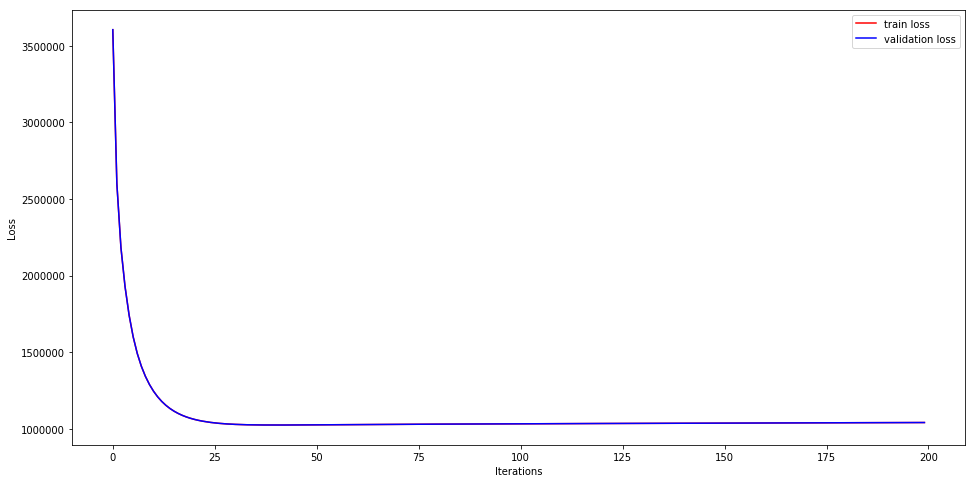

In [147]:
#画出图形
%matplotlib inline
import matplotlib.pyplot as plt

#plt.subplot(1,2,1)
plt.figure(figsize=(16,8))
plt.plot(train_loss,color='red',label="train loss")
plt.plot(validation_loss,color='blue',label="validation loss")
plt.legend(loc='upper right')
#plt.title("ALS")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()